<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/MultipleLinearRegressionFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

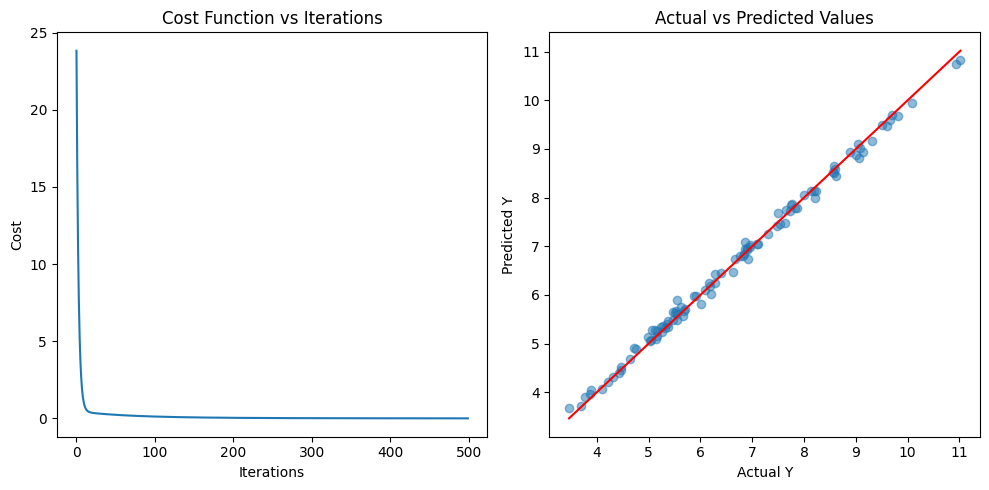

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class MultipleLinearRegression:
    def __init__(self, lr=0.01, iterations=1000):
        self.lr = lr
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            # 1. Prediction (Hypothesis)
            y_predicted = np.dot(X, self.weights) + self.bias

            # 2. Calculate Cost (MSE)
            cost = (1 / (2 * n_samples)) * np.sum((y_predicted - y)**2)
            self.cost_history.append(cost)

            # 3. Compute Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # 4. Update Parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# --- Example Usage & Visualization ---

# Generate synthetic data (3 features)
np.random.seed(42)
X = np.random.rand(100, 3)
y = 5 * X[:, 0] + 3 * X[:, 1] + 1.5 * X[:, 2] + 2 + np.random.randn(100) * 0.1

# Train Model
model = MultipleLinearRegression(lr=0.1, iterations=500)
model.fit(X, y)

# Visualization 1: Cost Reduction over time
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(model.cost_history)
plt.title("Cost Function vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")

# Visualization 2: Actual vs Predicted
y_pred = model.predict(X)
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red') # Ideal 45-degree line
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.tight_layout()
plt.show()
